<a href="https://colab.research.google.com/github/PedemonteGiacomo/ANALYSIS_and_DESIGN_of_ALGORITHMS/blob/main/NA_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***NETWORK ANALYSIS***

In [2]:
!nvidia-smi
#testla T4 processor simultaed (3mila euro di roba)

Thu May 11 20:47:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# ***Imports***

---


In [3]:
from matplotlib import pyplot as plt
import networkx as nx
import csv
import collections

# ***Functions***

---



to read the list of edges

In [4]:
def read_edge_list(file_path):
    """Reads the edge list file and returns a list of edges."""
    edges = []
    with open(file_path, 'r') as f:
        for line in f:
            u, v = line.strip().split()
            edges.append((u, v))
    return edges

write the list of edges in a gephi format

In [5]:
def write_edges_to_csv(edges, file_path):
    """Writes the edges to a CSV file."""
    with open(file_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['source', 'target'])
        for u, v in edges:
            writer.writerow([u, v])

# ***Graph initialization***

*Create the graph*

---



In [7]:
# Read the edge list file
print("reading the edge...")
edges = read_edge_list('facebook_combined.txt')
print("writing the edge...")
# Write the edges to a CSV file
write_edges_to_csv(edges, 'facebook_combined.csv')
print("create the graph...")
# Create a networkx graph from the edge list
G = nx.Graph()
G.add_edges_from(edges)

reading the edge...
writing the edge...
create the graph...


Plot the graph

---




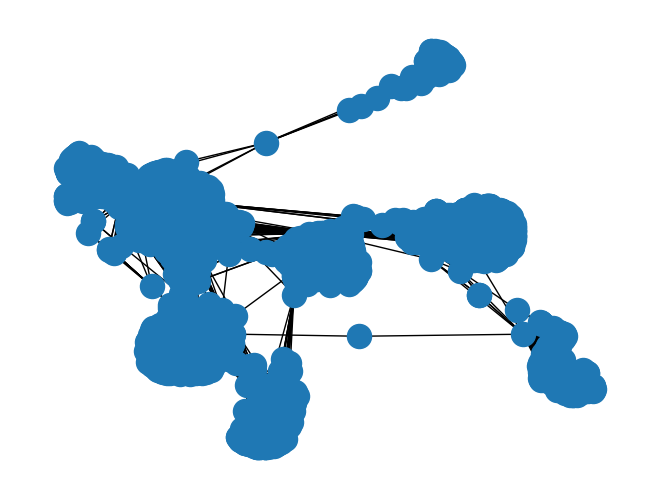

graph plotted succesfully...



In [8]:
# Plot the graph
nx.draw(G)
plt.show()
print("graph plotted succesfully...\n")

# ***METRICS***

## *Degree*

Frequency of degree in the network

---



The average degree is:  43.69101262688784


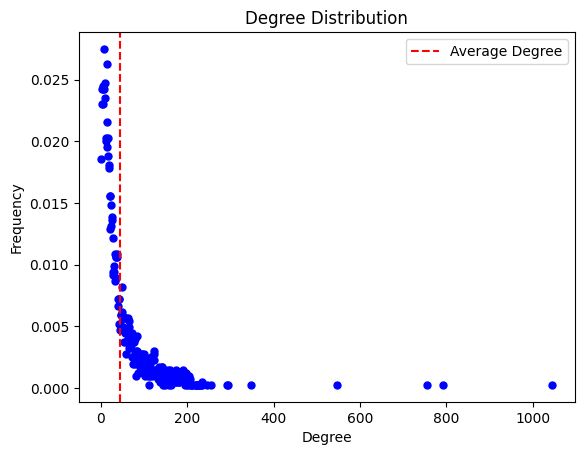

In [ ]:
# Calculate the average degree in the network
average_degree = sum(dict(G.degree()).values()) / len(G)

# Calculate degree of each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Count frequency of each degree value
degree_count = collections.Counter(degree_sequence)

# Calculate the proportion of nodes with each degree value
deg, cnt = zip(*degree_count.items())
degree_freq = [x / float(sum(cnt)) for x in cnt]

# Plot degree distribution
fig, ax = plt.subplots()
ax.plot(deg, degree_freq, 'bo', ms=5)
ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
ax.set_title('Degree Distribution')

# Add average degree to the plot
ax.axvline(x=average_degree, color='r', linestyle='--', label='Average Degree')

# Add legend
ax.legend()
print("The average degree is: ", average_degree)
# Display the plot
plt.show()

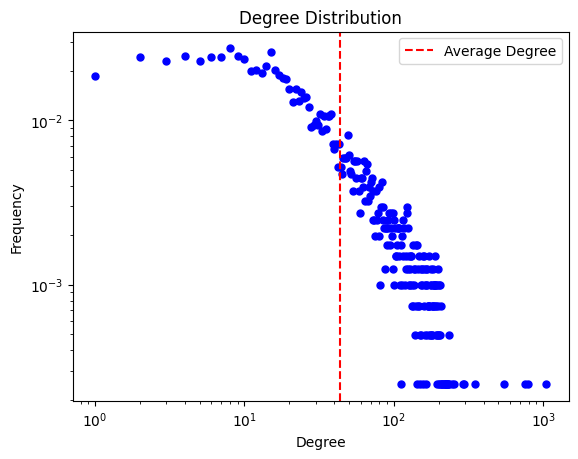

In [ ]:
# Calculate the proportion of nodes with each degree value
deg, cnt = zip(*degree_count.items())
degree_freq = [x / float(sum(cnt)) for x in cnt]

# Plot degree distribution with logarithmic scale
fig, ax = plt.subplots()
ax.plot(deg, degree_freq, 'bo', ms=5)
ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
ax.set_title('Degree Distribution')
ax.set_yscale('log')  # Set y-axis scale to logarithmic

# Add average degree to the plot on a logarithmic scale
ax.axvline(x=average_degree, color='r', linestyle='--', label='Average Degree')
ax.set_xscale('log')  # Set x-axis scale to logarithmic

# Add legend
ax.legend()

# Display the plot
plt.show()

***SCALE FREE NETWORK***

Logaritmic view to obtain pattern visualization inside the network and obtain a different look of the distribution.

Verify if the degree distribution of the network follows the power law distribution and can be categorized as scale-free network.

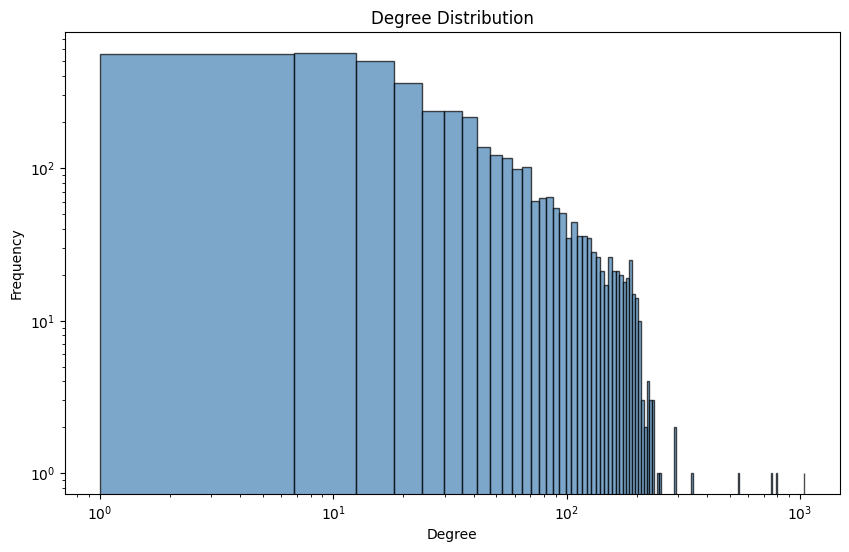

In [ ]:
# Calculate the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins='auto', alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.xscale('log')
plt.yscale('log')
plt.show()

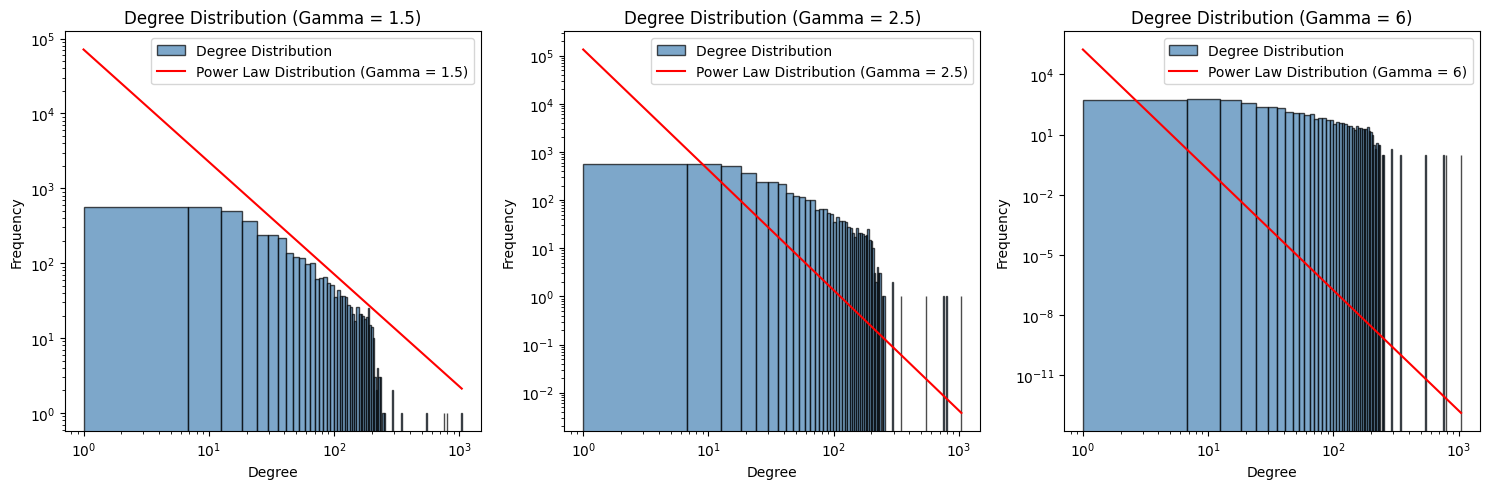

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plot the degree distribution
plt.figure(figsize=(15, 5))

# Plot for gamma = 1.5
plt.subplot(1, 3, 1)
plt.hist(degree_sequence, bins='auto', alpha=0.7, color='steelblue', edgecolor='black', label='Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Gamma = 1.5)')
plt.xscale('log')
plt.yscale('log')

# Generate the power law distribution for gamma = 1.5
gamma_1 = 1.5
max_degree = max(degree_sequence)
x = np.linspace(1, max_degree, num=1000)
power_law_1 = x**(-gamma_1)
power_law_1 *= sum(degree_sequence) / sum(power_law_1)

plt.plot(x, power_law_1, 'r-', label=f'Power Law Distribution (Gamma = {gamma_1})')
plt.legend()

# Plot for gamma = 2.5
plt.subplot(1, 3, 2)
plt.hist(degree_sequence, bins='auto', alpha=0.7, color='steelblue', edgecolor='black', label='Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Gamma = 2.5)')
plt.xscale('log')
plt.yscale('log')

# Generate the power law distribution for gamma = 2.5
gamma_2 = 2.5
power_law_2 = x**(-gamma_2)
power_law_2 *= sum(degree_sequence) / sum(power_law_2)

plt.plot(x, power_law_2, 'r-', label=f'Power Law Distribution (Gamma = {gamma_2})')
plt.legend()

# Plot for gamma = 6
plt.subplot(1, 3, 3)
plt.hist(degree_sequence, bins='auto', alpha=0.7, color='steelblue', edgecolor='black', label='Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Gamma = 6)')
plt.xscale('log')
plt.yscale('log')

# Generate the power law distribution for gamma = 6
gamma_3 = 6
power_law_3 = x**(-gamma_3)
power_law_3 *= sum(degree_sequence) / sum(power_law_3)

plt.plot(x, power_law_3, 'r-', label=f'Power Law Distribution (Gamma = {gamma_3})')
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


The value of γ in a scale-free network can vary depending on the specific network and its characteristics. However, in many real-world networks, the value of γ often falls within the range of 2 to 3. A γ value close to 2 indicates a more "hierarchical" network with a few highly connected hubs, while a γ value closer to 3 indicates a more "egalitarian" network with a more evenly distributed degree distribution.

After this representation we can conclude that can be classified as scale-free network

High degree nodes

---



A low number nodes are "hubs" so we can identify them.

There are 8 nodes with degree >= 250:
- Node 0 has degree 347
- Node 107 has degree 1045
- Node 1684 has degree 792
- Node 1912 has degree 755
- Node 1888 has degree 254
- Node 2543 has degree 294
- Node 3437 has degree 547
- Node 2347 has degree 291


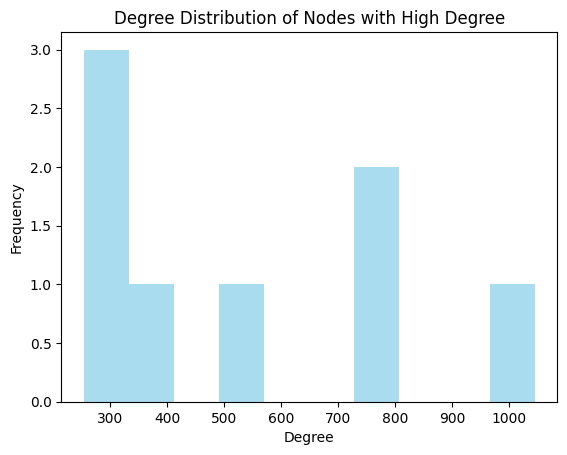

In [ ]:
# Identify the nodes with the highest degree
high_degree_nodes = [n for n, deg in G.degree() if deg >= 250]

# Print some information about the high degree nodes
print("There are", len(high_degree_nodes), "nodes with degree >= 250:")
for node in high_degree_nodes:
    print("- Node", node, "has degree", G.degree()[node])

# Get the degrees of the high degree nodes
degrees = [G.degree()[node] for node in high_degree_nodes]

# Plot the degree distribution
plt.hist(degrees, bins=10, alpha=0.7, color='skyblue')

# Set the labels and title
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Nodes with High Degree')

# Display the plot
plt.show()

Aggiungere conclusioni degree

### *Degree Assortativity* ***(Closure)***

Degree assortativity coefficient measures the preference of nodes in a network to attach to other nodes with a similar degree. In other words, it quantifies the tendency of high-degree nodes to connect with other high-degree nodes (assortative mixing) or with low-degree nodes (disassortative mixing).

A positive assortativity coefficient indicates assortative mixing, where high-degree nodes tend to connect with other high-degree nodes, forming hubs or highly connected regions. On the other hand, a negative assortativity coefficient indicates disassortative mixing, where high-degree nodes tend to connect with low-degree nodes, resulting in a more diverse and interconnected network structure.

In [19]:
print("calculating closure...")
hubs = nx.degree_assortativity_coefficient(G)
print("Hubs: ", hubs, "\n")

calculating closure...
Hubs:  0.06357722918564943 



The hubs coefficient is calculated as 0.065. This positive value suggests a slight tendency towards assortative mixing, indicating that high-degree nodes in your network are more likely to connect with other high-degree nodes. However, the value is relatively small, indicating a relatively weak or moderate level of assortativity.

## *Closeness*

In [ ]:
print("calculating closeness...")
closeness = nx.closeness_centrality(G)

calculating closeness...


In [ ]:
print("Closeness: ", closeness, "\n")

Closeness:  {'0': 0.35334266713335666, '1': 0.2613761408505405, '2': 0.26125776397515527, '3': 0.2613761408505405, '4': 0.26125776397515527, '5': 0.2613084837895554, '6': 0.26119016817593793, '7': 0.2747686445291236, '8': 0.2612239617026782, '9': 0.2620546433902265, '10': 0.26125776397515527, '11': 0.26110572259941806, '12': 0.26110572259941806, '13': 0.26161321671525756, '14': 0.2613423079412336, '15': 0.26110572259941806, '16': 0.2612408617454875, '17': 0.2613084837895554, '18': 0.26110572259941806, '19': 0.2613592233009709, '20': 0.2613423079412336, '21': 0.2756125861715924, '22': 0.2612746683921061, '23': 0.2613761408505405, '24': 0.2613592233009709, '25': 0.26225888160031174, '26': 0.26224184959085595, '27': 0.2611732746911584, '28': 0.2613084837895554, '29': 0.2613084837895554, '30': 0.2613761408505405, '31': 0.2614776921582594, '32': 0.26119016817593793, '33': 0.26112260734609416, '34': 0.3033125516412529, '35': 0.26112260734609416, '36': 0.2612746683921061, '37': 0.261105722599

Closeness distrubution

---



The closeness centrality score measures how quickly a node can reach other nodes in the network, which is an important measure of node importance in the network.

In this scatter plot, the points are color-coded based on another node attribute, which can help identify any patterns or relationships between node attributes and closeness centrality. For example, nodes with a similar color may represent nodes that are part of the same community or have a similar degree centrality score.

From the scatter plot, we can observe that some nodes have a much higher closeness centrality score than others, which indicates that they are more important in the network for transmitting information. We can also see that there are some nodes that are outliers, with either very low or very high closeness centrality scores, which may indicate nodes that are either isolated from the rest of the network or highly connected to other nodes.

Overall, this scatter plot provides a useful visualization of the closeness centrality of nodes in the network and can help identify important nodes and patterns in the network structure.

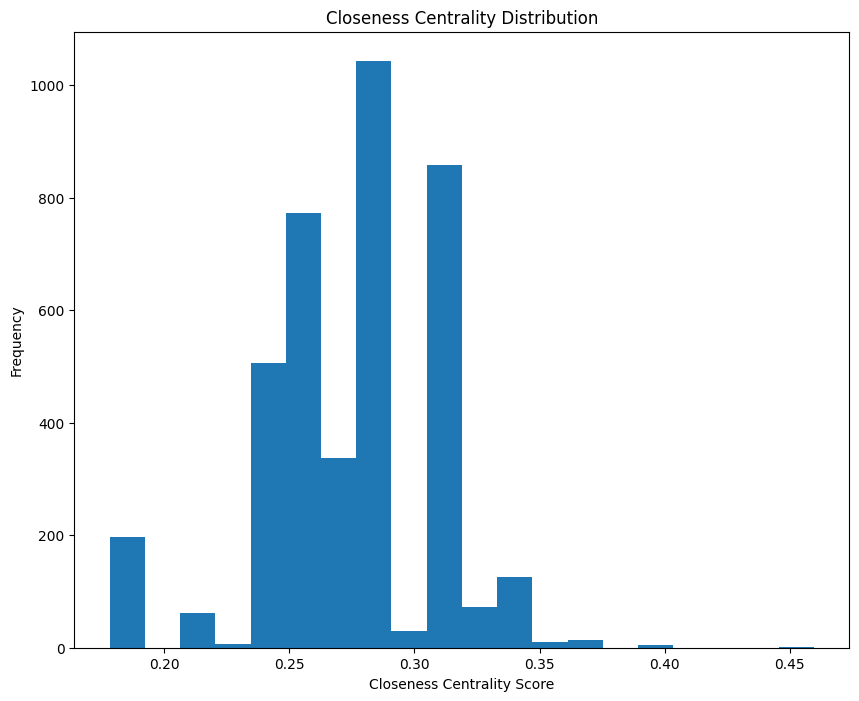

In [ ]:
# plot histogram of closeness centrality
plt.figure(figsize=(10, 8))  # set the figure size
plt.hist(list(closeness.values()), bins=20)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality Score")
plt.ylabel("Frequency")
plt.show()

The resulting histogram can provide valuable information about the centrality distribution in the network. 

For example, a right-skewed distribution (i.e., with a long tail to the right) indicates that a few nodes have very high closeness centrality scores, while most nodes have lower scores.

This could suggest the presence of "hubs" in the network that are highly connected to other nodes. 

On the other hand, a roughly symmetric distribution with a peak in the middle suggests that closeness centrality is more evenly distributed across the network, with no single node dominating the connections.

Find the node with higher closeness centrality

---



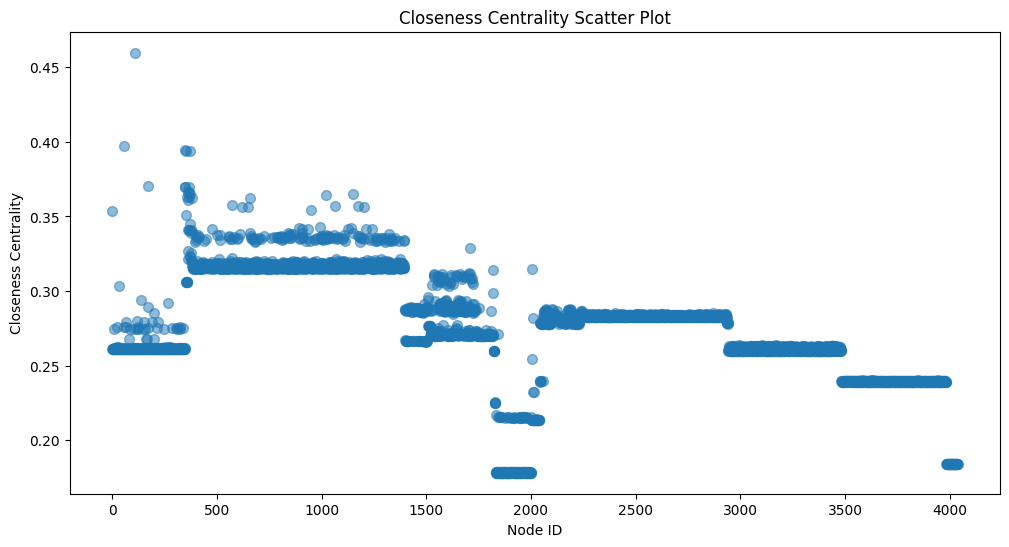

In [ ]:
# get x and y coordinates for scatter plot
x = list(range(len(closeness)))
y = list(closeness.values())

# create scatter plot
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, s=50, alpha=0.5)

# add labels and title
ax.set_xlabel("Node ID")
ax.set_ylabel("Closeness Centrality")
ax.set_title("Closeness Centrality Scatter Plot")

plt.show()

In [ ]:
max_closeness = max(closeness.values())
max_nodes = [k for k, v in closeness.items() if v == max_closeness]
print("Nodes with maximum closeness centrality:", max_nodes)

Nodes with maximum closeness centrality: ['107']


Closeness conclusions:

The distribution of closeness centrality scores indicates the relative importance of nodes in the network in terms of their ability to reach other nodes in the network.

In this case, the highest frequency of centrality score being around 0.30 suggests that there are a large number of nodes that are relatively central to the network and have a high ability to reach other nodes efficiently. 

This could indicate that the network is well-connected and that information or influence can spread relatively quickly through the network. 

## *Betweenness*

In [ ]:
print("calculating betweenness...")
betweenness = nx.betweenness_centrality(G)
print("Betweenness: ", betweenness, "\n")

In [ ]:
betweenness_values = list(betweenness.values())

plt.hist(betweenness_values, bins=50)
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.show()

This is a representive result since if the betweenness centrality values for most of the nodes in the network are very low (e.g., close to 0.01 like in this case), it may indicate that there is no clear bottleneck or bridge node in the network that is critical for connecting different parts of the network. 

In other words, the network may be relatively well-connected and resilient to node removals.

In further representation we try to perform this and seeing if the network is resilient as should be expected to be.

Node with max betweenness:

---



It's still important to investigate the nodes with higher betweenness centrality values, as they may play a more important role in connecting different parts of the network or facilitating information flow. 

In [ ]:
max_betweenness = max(betweenness.values())
max_betweenness_nodes = [node for node, value in betweenness.items() if value == max_betweenness]
print("Node(s) with highest betweenness centrality: ", max_betweenness_nodes)

In [ ]:
# find the node with the highest betweenness centrality
max_betweenness = max(betweenness, key=betweenness.get)

# examine neighbors of node with highest betweenness centrality
neighbors = list(G.neighbors(max_betweenness))
print("Neighbors of node with highest betweenness centrality:", len(neighbors))
print(neighbors)

Current flow betweenness centrality

---



In this case we are checking if the node which have the highest betweenness is also the one which have the highest current flow betweenness centrality.

The current flow betweenness centrality  is a centrality measure that takes into account the flow of information through a network. It is based on the idea that the importance of a node in a network is related to the amount of current that flows through it when a voltage is applied to the network. 

In other words, nodes that lie on many paths that carry current between other nodes will have high current flow betweenness centrality scores.

In [ ]:
# calculate current flow betweenness centrality
cf_betweenness = nx.algorithms.centrality.current_flow_betweenness_centrality(G)

# find node with the highest current flow betweenness centrality
max_cf_betweenness = max(cf_betweenness, key=cf_betweenness.get)

print("Node with highest current flow betweenness centrality:", max_cf_betweenness)

So the node with highest betweenness centrality is the same which has the highest degree in the network and also the highest current flow betweenness centrality.

So, with this analysis is clear that the node with the highest betweenness centrality is also the node with the highest degree.

This may indicate that this node serves as a hub in the network.

Hubs are nodes that have a large number of connections to other nodes in the network, and they play an important role in network connectivity and information flow.

In this case, the node with the highest degree and betweenness centrality may be a key player in the network, and its removal could have a significant impact on the network's structure and function. 

But in our analysis, for the moment is to analyze the network and understand his metrics so we can do it in another moment.

## *Components*

In [ ]:
print("calculating components...")
cc = list(nx.connected_components(G))
giant_component = max(cc, key=len)
print("CC: ", cc, "\n")
print("Giant Component: ", giant_component, "\n")

nx.number_connected_components(G)

calculating components...
CC:  [{'1350', '714', '2425', '131', '165', '3143', '3855', '3346', '1896', '407', '525', '3972', '674', '1443', '545', '3085', '3703', '3163', '1538', '3285', '1420', '1229', '632', '1509', '3487', '3152', '2390', '489', '2099', '3498', '1532', '1820', '3194', '213', '1892', '1744', '3581', '1610', '3973', '3736', '1862', '759', '79', '56', '261', '941', '1786', '63', '719', '40', '1174', '3402', '3117', '1410', '755', '1328', '1444', '2000', '3259', '1920', '2562', '1904', '2892', '2029', '449', '878', '1324', '3921', '1271', '280', '2993', '427', '338', '1039', '3149', '2079', '1979', '208', '2605', '2076', '3760', '3833', '1036', '1052', '1428', '1150', '2966', '3260', '194', '1792', '74', '269', '3424', '2521', '3248', '3667', '2043', '2616', '1493', '1903', '2853', '900', '263', '342', '2254', '2748', '775', '1575', '1937', '2518', '3454', '3871', '3471', '1277', '3239', '3708', '341', '3168', '1819', '685', '3744', '2118', '1387', '3914', '3362', '1650'

1

Connected Components visualization

---

In [ ]:
# iterate over the components and create a subgraph for each one
for i, component in enumerate(cc):
    subgraph = G.subgraph(component)
    
    # plot the subgraph using spring layout
    pos = nx.spring_layout(subgraph, seed=42)
    plt.figure(figsize=(8, 8))
    nx.draw_networkx(subgraph, pos=pos, node_color="skyblue", node_size=50, with_labels=False)
    plt.title(f"Connected Component {i+1}", fontsize=16)
    plt.axis("off")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_component_heatmap(G, components):
    """
    Plot a heatmap to visualize the relationship between components.
    """
    sns.set(rc={"figure.figsize":(len(components), len(components))})
    cmap = sns.color_palette("bright", as_cmap=True)

    component_map = {node: i for i, component in enumerate(components) for node in component}
    component_matrix = [[component_map[i] == component_map[j] for j in G] for i in G]
    sns.heatmap(component_matrix, cmap=cmap, square=True, xticklabels=False, yticklabels=False, cbar=False, linewidths=0.1, linecolor='black', edgecolor='black')

    plt.show()

print("calculating components...")
cc = list(nx.connected_components(G))
giant_component = max(cc, key=len)
print("CC: ", cc, "\n")
print("Giant Component: ", giant_component, "\n")

plot_component_heatmap(G, cc)

Giant component visualization

---



In [ ]:
# Create subgraph for the giant component
giant_subgraph = G.subgraph(giant_component)

# Plot the giant component
pos = nx.spring_layout(giant_subgraph)
nx.draw(giant_subgraph, pos, with_labels=False)
plt.show()

# Get the number of nodes in the giant component
num_nodes_giant_component = len(giant_subgraph)

print("Number of nodes in the giant component:", num_nodes_giant_component)

Components conclusion

---

The network appears to be a single connected component, which means that all nodes in the network are reachable from each other via paths along the edges(the connected components number is 1, this also confirm what before mentioned in the betweenness part). 

This indicates that the network is relatively cohesive and there are no isolated nodes or subgroups that are not connected to the rest of the network. 

The visualization of the network using the spring layout shows that the nodes are relatively evenly distributed throughout the network and there are no clear clusters or communities. 

The lack of distinct clusters or communities suggests that the nodes in the network are relatively similar in terms of their connectivity patterns and there are no strong divisions or subgroups within the network. 

Overall, this suggests that the network is relatively homogenous and well-connected, and there are no clear barriers or obstacles to the spread of information or influence throughout the network.

## *Diameter*

So now that we have discovered that we have the network as a single connected component we can discover which kind of another characteristic like the diameter that could be helpful to understand how the network is organized

In [ ]:
print("calculating diameter...")
diameter = nx.diameter(G)
print("Diameter: ", diameter, "\n")

calculating diameter...
Diameter:  8 



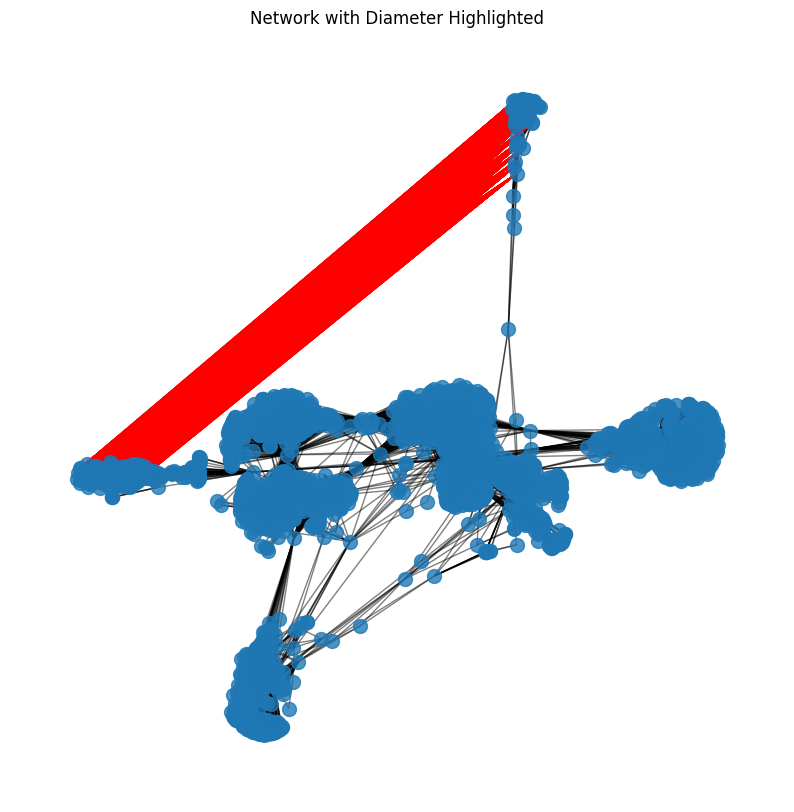

In [ ]:
# Create a layout for the network
pos = nx.spring_layout(G)

# Plot the network with node labels and edges
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Find the node pairs that contribute to the diameter
diameter_pairs = nx.all_pairs_shortest_path_length(G)
diameter_edges = [(u, v) for u, v_dict in diameter_pairs for v, d in v_dict.items() if d == diameter]

# Highlight the diameter edges with a different color
nx.draw_networkx_edges(G, pos, edgelist=diameter_edges, edge_color='red', width=1)

plt.title("Network with Diameter Highlighted")
plt.axis('off')
plt.show()

A diameter of 8 in your graph indicates that the maximum shortest path length between any pair of nodes is 8. This information can provide insights into the structure and connectivity of your network. Here are a few conclusions you can draw:

1. Network Efficiency: The diameter gives an indication of how efficiently information or influence can spread within the network. With a diameter of 8, it suggests that, on average, it would take a maximum of 8 steps or hops to transmit information from one end of the network to another.

2. Connectivity: A diameter of 8 suggests that there are relatively long paths connecting some pairs of nodes in the network. This could indicate the presence of distinct clusters or communities within the network that are more loosely connected to each other.

3. Network Resilience: In terms of network robustness, a larger diameter implies that the network may be more susceptible to disruptions. If one or more central nodes or critical edges are removed, it could significantly increase the distance between some pairs of nodes in the network.

4. Network Exploration: Knowing the diameter can help in planning strategies for exploring the network. It provides an upper bound on the number of steps required to explore the entire network or reach specific nodes from any starting point.

Overall, the diameter is a valuable measure for understanding the global connectivity and efficiency of information transmission in your network. It can help identify potential bottlenecks, areas of interest, or paths of influence within the network. 

Keep in mind that interpreting the implications of the diameter should be done in conjunction with other network measures and domain-specific knowledge.

## *Brokerage*


The brokerage centrality of a node in a network quantifies the extent to which that node acts as a broker or intermediary between other nodes in the network. It measures the potential control or influence a node has over the flow of information, resources, or interactions between different parts of the network.

Specifically, the brokerage centrality of a node is calculated based on the number of connections it has to nodes that are not directly connected to each other. Nodes with high brokerage centrality play a critical role in connecting different groups or communities within the network, facilitating the flow of information or resources between them.

By calculating brokerage centrality for each node in a network, you can identify the nodes that have the highest potential to control or mediate the flow of information or resources. These nodes are often referred to as "brokers" or "bridges" and can be crucial in facilitating collaboration, spreading information, or controlling the flow of influence within the network.

In [22]:
betweenness = nx.betweenness_centrality(G)
brokerage = {node: centrality * (G.number_of_nodes() - 1) for node, centrality in betweenness.items()}
print("Brokerage Centrality:", brokerage)

Brokerage Centrality: {'0': 590.783310913745, '1': 0.011238862111608175, '2': 0.00030668695518831757, '3': 0.0068042951186374516, '4': 0.0007431260837255387, '5': 0.008907683294604275, '6': 9.908347783007183e-05, '7': 0.6876652770717109, '8': 0.001114689125588308, '9': 0.06644220619162264, '10': 0.00020136454311128052, '11': 0.0, '12': 0.0, '13': 0.0071160533581727985, '14': 0.0022543635870363636, '15': 0.0, '16': 0.0008067705655460103, '17': 0.0016582720942393964, '18': 0.0, '19': 0.020444224258938156, '20': 0.002743293367519278, '21': 3.787742464470975, '22': 0.002706672288696459, '23': 0.027702089009990914, '24': 0.0005521348164399935, '25': 0.21757079717122763, '26': 0.07815293791150305, '27': 0.00012385434728758978, '28': 0.0015393504742030873, '29': 0.005634955488984294, '30': 0.00552989054788202, '31': 0.019918005378769397, '32': 0.0, '33': 0.0, '34': 14.545231861656923, '35': 0.0, '36': 0.00011009275314452423, '37': 0.0, '38': 0.002965701497600398, '39': 0.0038557378528742475, 

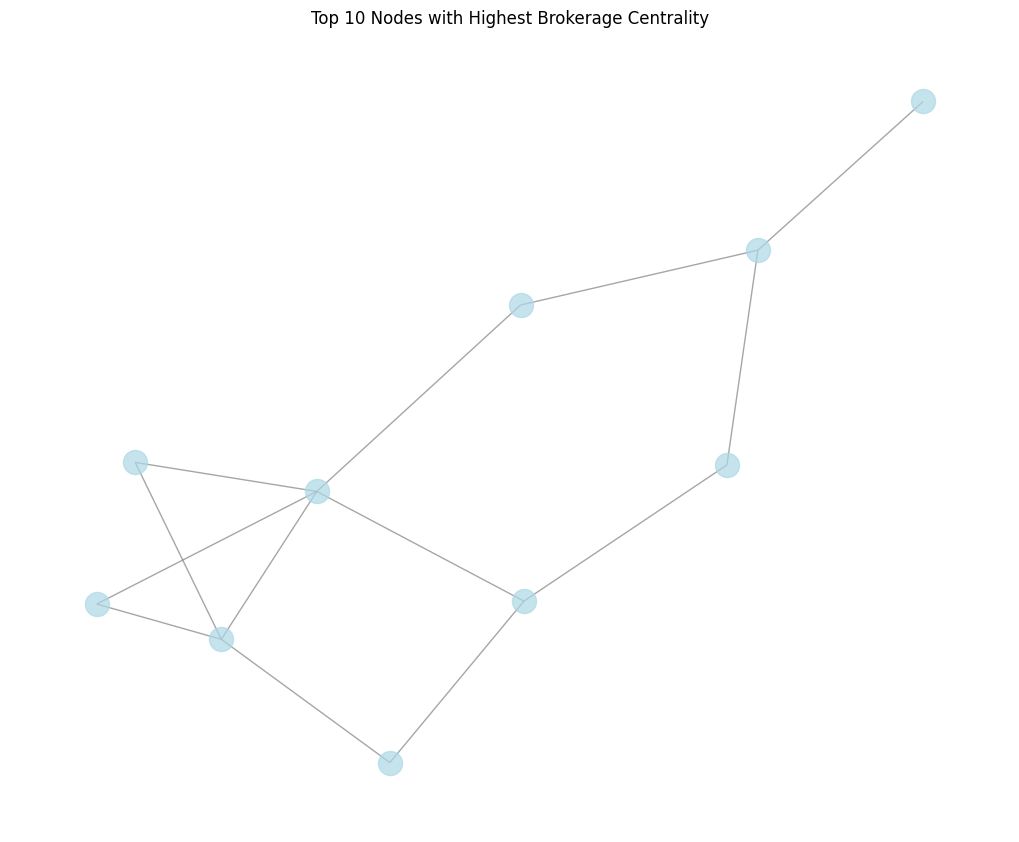

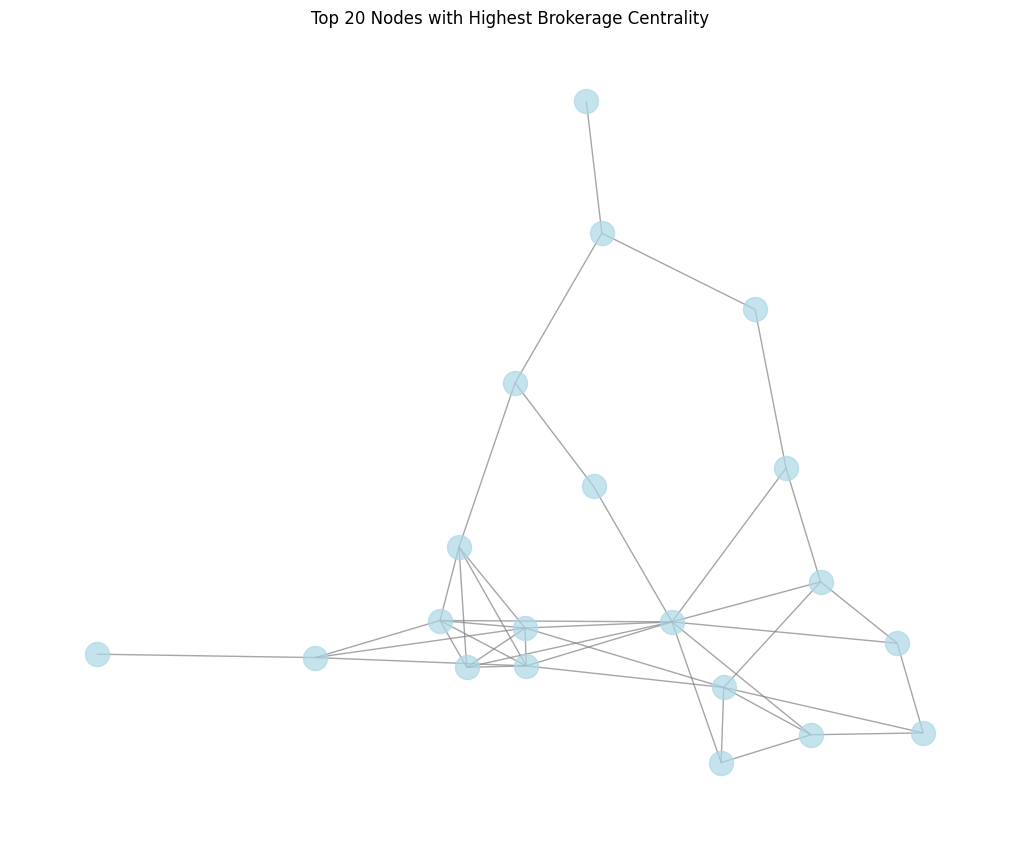

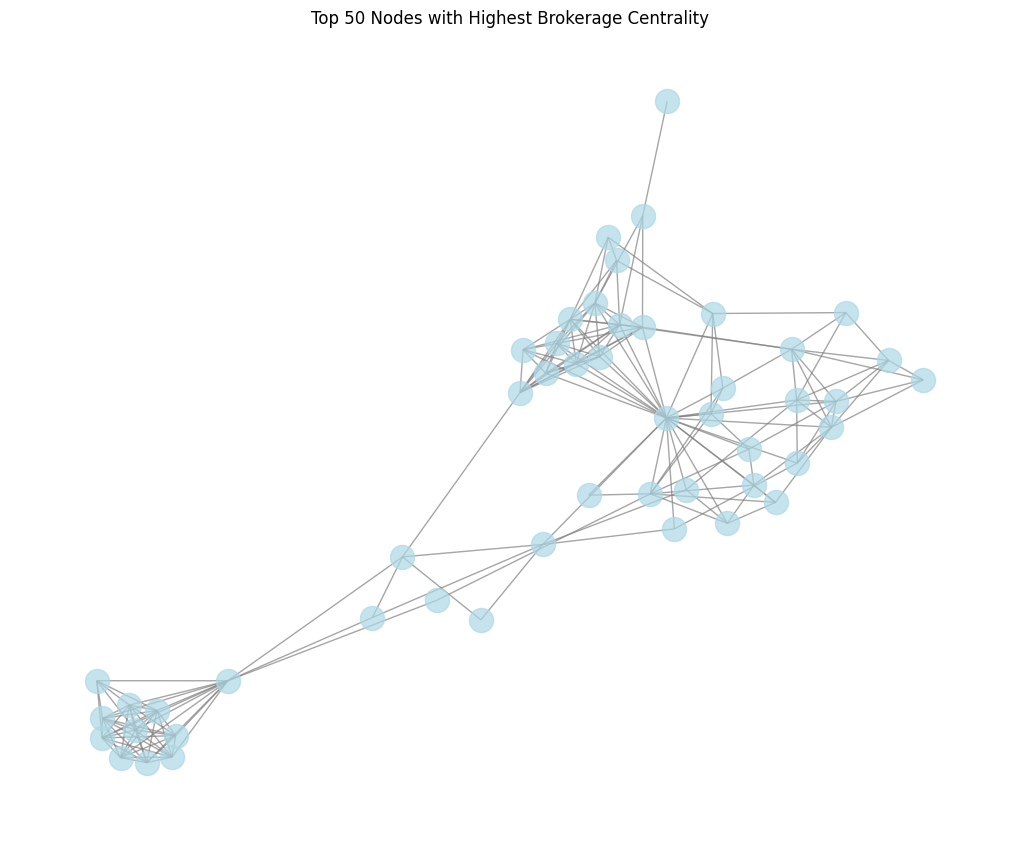

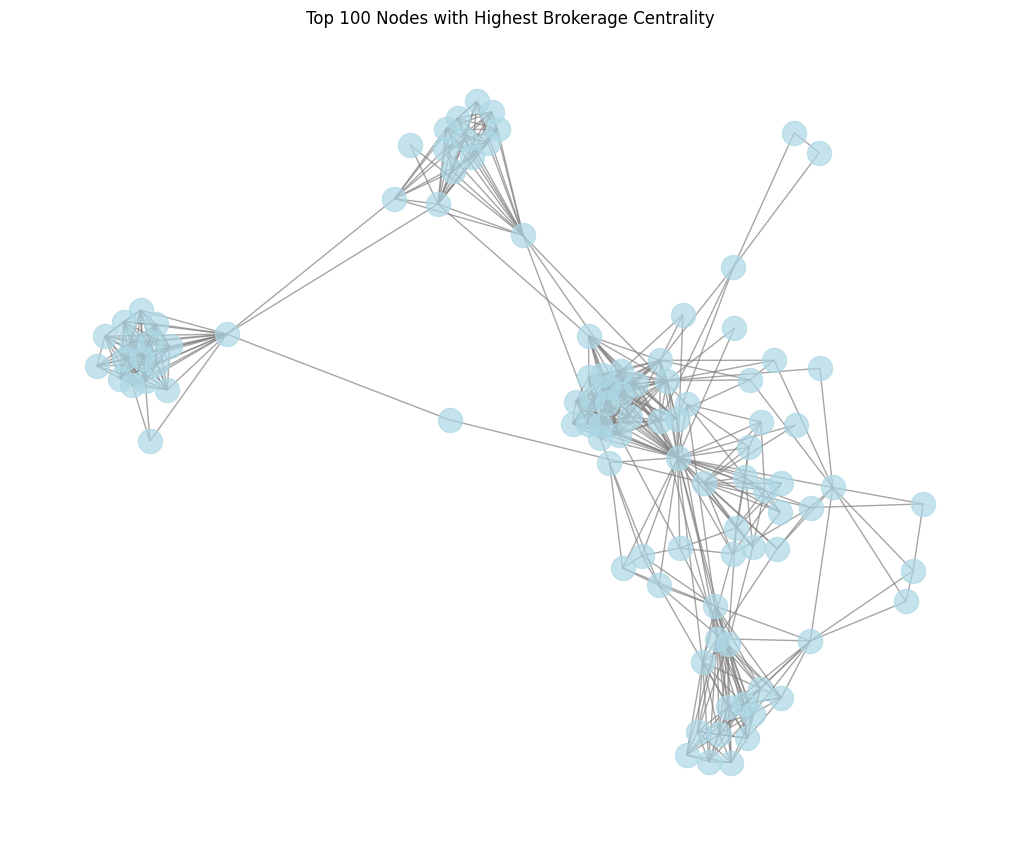

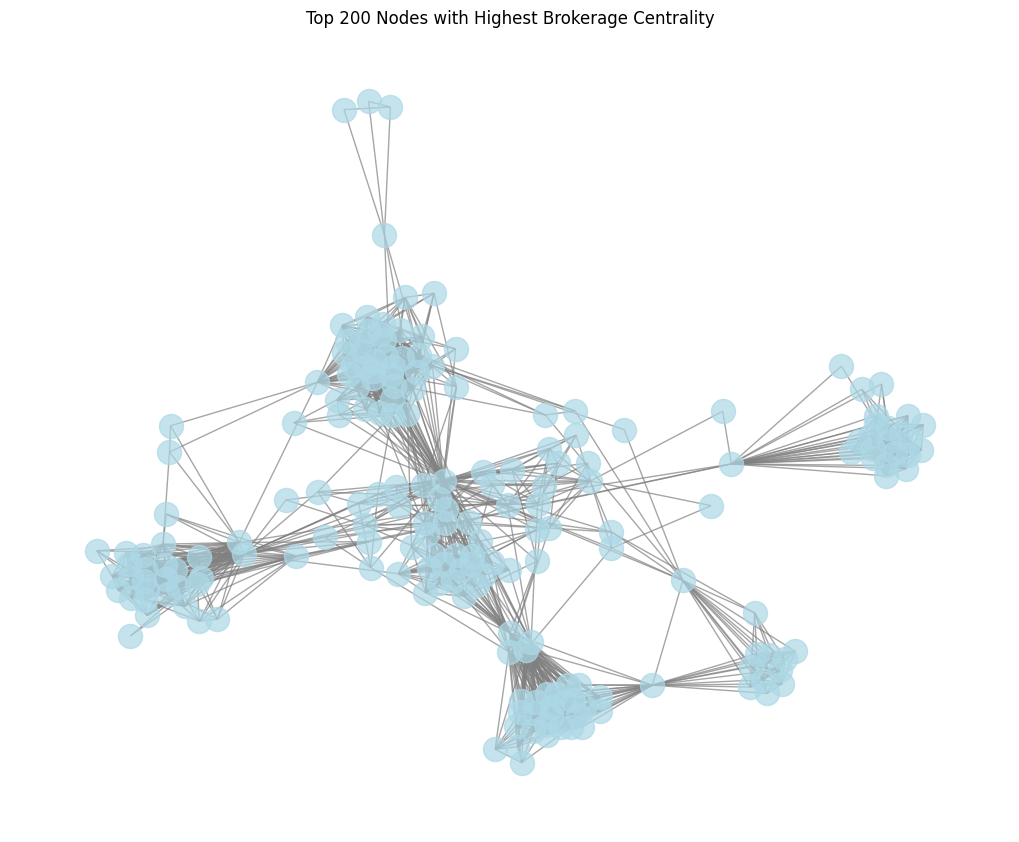

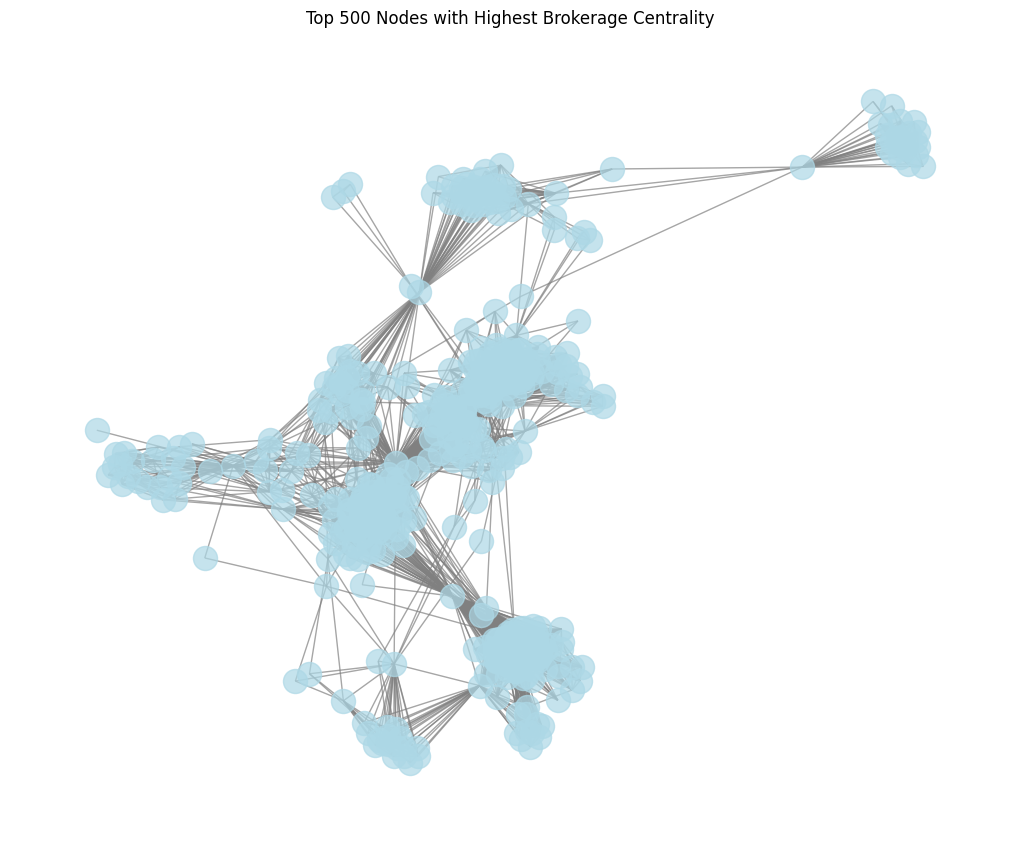

In [28]:
# Assuming you have already calculated the brokerage centrality and stored it in the variable 'brokerage'
# Sort the nodes based on their brokerage centrality in descending order
sorted_nodes = sorted(brokerage, key=brokerage.get, reverse=True)

# Define the values of k for subgraph visualization
k_values = [10, 20, 50, 100, 200, 500]

# Iterate over the k values and create subgraphs
for k in k_values:
    # Select the top k nodes with the highest brokerage centrality
    top_k_nodes = sorted_nodes[:k]
    print(top_k_nodes)

    # Create a subgraph containing only the top k nodes and their edges
    subgraph = G.subgraph(top_k_nodes)

    # Visualize the subgraph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(subgraph)  # Choose a layout algorithm
    nx.draw(subgraph, pos, with_labels=False, node_color='lightblue', edge_color='gray', alpha=0.7)
    plt.title(f'Top {k} Nodes with Highest Brokerage Centrality')
    plt.show()

 the betweenness_centrality function calculates the betweenness centrality for each node in the network. Then, we multiply the centrality values by (G.number_of_nodes() - 1) to scale them to the range of potential brokerage values.

Note that this approach approximates brokerage centrality and might not capture all aspects of brokerage in the network. 

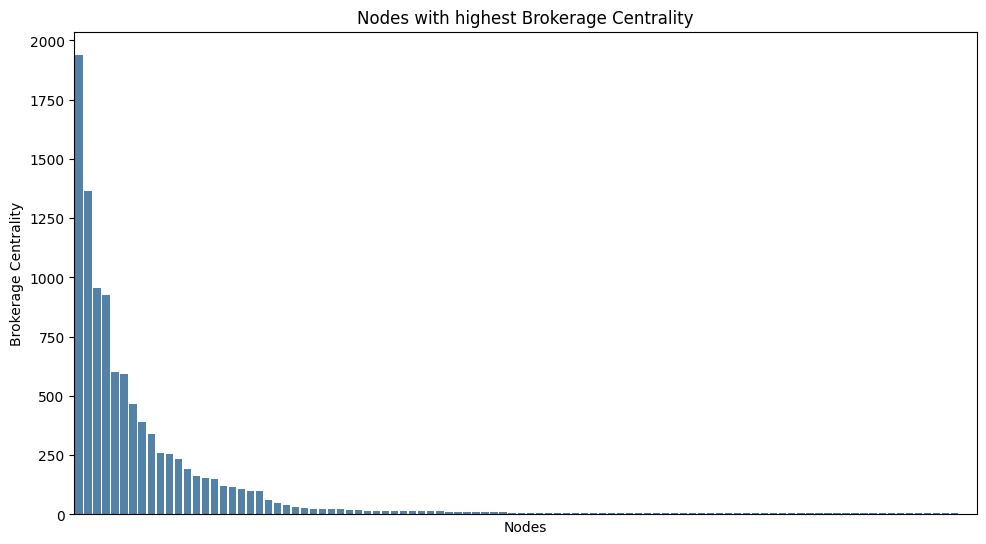

In [42]:
import seaborn as sns

# Assuming you have already calculated the brokerage centrality and stored it in the variable 'brokerage'
# Sort the nodes based on their brokerage centrality in descending order
sorted_nodes = sorted(brokerage, key=brokerage.get, reverse=True)

# Select the top k nodes with the highest brokerage centrality
k = 100
top_k_nodes = sorted_nodes[:k]

# Extract the nodes and their corresponding brokerage centrality values for the top k nodes
nodes = top_k_nodes
values = [brokerage[node] for node in top_k_nodes]

# Create a dataframe to hold the node and value data
data = {'Node': nodes, 'Brokerage Centrality': values}
df = pd.DataFrame(data)

# Plot the brokerage centrality values using Seaborn's bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Node', y='Brokerage Centrality', color='steelblue')
plt.xlabel('Nodes')
plt.ylabel('Brokerage Centrality')
plt.title('Nodes with highest Brokerage Centrality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks([])
plt.show()

In [43]:
# Find the node with the highest brokerage centrality
highest_brokerage_node = max(brokerage, key=brokerage.get)
# Print the node with the highest brokerage centrality
print("Node with highest brokerage centrality:", highest_brokerage_node)

Node with highest brokerage centrality: 107


Also, the brokerage distribution follows a power law distribution that also indicates the precedent assumed concerns about the scale-free characteristic of the network.

## *Density*

In [ ]:
print("calculating density...")
density = nx.density(G)
print("Density: ", density, "\n")

calculating density...
Density:  0.010819963503439287 



Conclusioni density...
A value closer to 0 indicates a sparse graph, and a value closer to 1 indicates a dense graph
Our is a dense graph

## *Clustering*


Clustering in a network refers to the tendency of nodes to form clusters or groups. It measures the extent to which nodes in a network tend to connect with each other, forming tightly interconnected groups. Clustering provides insights into the local structure of the network, revealing patterns of connectivity and the presence of communities.

In [10]:
print("calculating clustering...")
global_clustering = nx.average_clustering(G)
print("Global Clustering: ", global_clustering, "\n")

calculating clustering...
Global Clustering:  0.6055467186200876 



The global clustering coefficient, calculated using nx.average_clustering(G), provides an overall measure of the average clustering in the entire network. A value close to 1 indicates a high level of clustering, meaning that nodes in the network tend to form clusters or tightly connected groups. In your case, with an average clustering coefficient of approximately 0.6, it suggests that your network exhibits a moderate level of clustering.

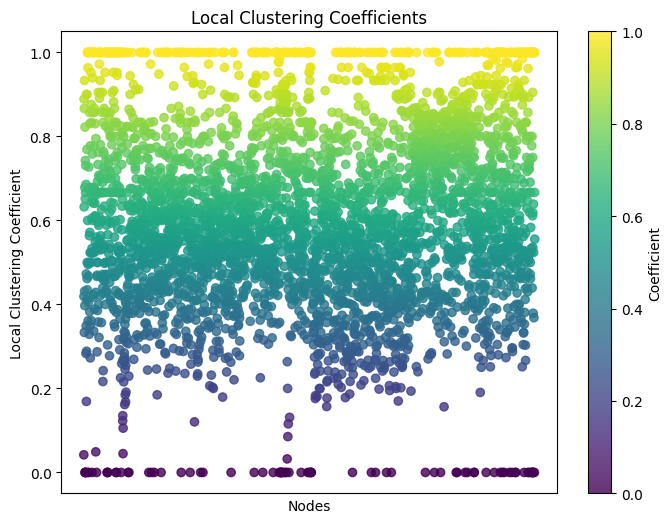

In [14]:
local_clustering = nx.clustering(G)

# Extract node labels and corresponding local clustering coefficients
nodes = list(local_clustering.keys())
coefficients = list(local_clustering.values())

# Plot the local clustering coefficients
plt.figure(figsize=(8, 6))
plt.scatter(nodes, coefficients, c=coefficients, cmap='viridis', alpha=0.8)
plt.xlabel('Nodes')
plt.ylabel('Local Clustering Coefficient')
plt.title('Local Clustering Coefficients')
plt.colorbar(label='Coefficient')

# Remove x-labels
plt.xticks([])

plt.show()


The local clustering coefficients, are calculated using nx.clustering(G), provides a measure of clustering for each node in the network. It quantifies the extent to which the neighbors of a particular node are interconnected. Local clustering coefficients can help identify nodes that are highly clustered or act as important connectors within their local neighborhoods.

Nodes with a local clustering coefficient of 1 indicate that all their neighbors are connected. These nodes form what is known as a complete subgraph or a clique. They represent highly clustered regions in the network where all possible connections between their neighbors exist. These nodes can be considered the core of densely connected communities or highly cohesive groups within the network.

Nodes with a local clustering coefficient between 0 and 1, but less than 1, indicate that some of their neighbors are connected to each other, but not all possible connections exist. These nodes are still part of locally clustered regions but may have some missing connections. They are typically located at the boundaries of communities or serve as bridges between different clusters.

Nodes with a local clustering coefficient of 0 indicate that none of their neighbors are connected to each other. These nodes represent isolated or disconnected nodes in the network. They can be considered outliers or nodes that are not part of any cohesive group or cluster.

Analyzing the distribution of local clustering coefficients across nodes can provide insights into the overall structure of the network. For example, if a significant portion of nodes has high clustering coefficients (close to 1), it suggests the presence of tightly connected communities or modules in the network. On the other hand, if a large number of nodes have low clustering coefficients (close to 0), it indicates a more random or decentralized network structure.

Moreover we can see that there are very much nodes that have high local clustering so we can assume that the overall network is well connected and there are radicated communities where nodes(people) knows each other end neighbours friends too.

## ***IMPROVEMENTS***

Given that your dataset is about Facebook, there are several properties that may be interesting to analyze. Here are a few suggestions:

- Community structure: Facebook is known for its emphasis on social connections and communities. Analyzing the community structure of your network could reveal important insights into the nature of these communities, their size, and their relationships with one another.

- PageRank centrality: PageRank is a centrality measure that is commonly used in web graph analysis. In the context of Facebook, it could be used to identify the most influential pages or profiles in the network.

- Clustering coefficient: The clustering coefficient measures the extent to which nodes in a network tend to cluster together. In the context of Facebook, this could reveal important insights into the nature of social connections on the platform, and how they tend to form.

- Content analysis: If your dataset includes information about the content of Facebook posts or messages, you could perform text analysis to identify patterns or trends in the topics that are being discussed on the platform.

- Sentiment analysis: Similarly, if your dataset includes information about the sentiment of Facebook posts or messages, you could perform sentiment analysis to identify patterns or trends in the overall sentiment of content on the platform.

In [ ]:
# ...

# ***COMMUNITIES***

In [ ]:
import matplotlib.cm as cm
from networkx.algorithms.community.quality import is_partition

### *Label propagation*

In [ ]:
from networkx.algorithms.community import label_propagation_communities

# Calculate the best partition using the Label Propagation algorithm
communities = list(label_propagation_communities(G))
partition = {}
for i, c in enumerate(communities):
    for n in c:
        partition[n] = i

# Print nodes in each community
for community in communities:
  print("Communities:", community)

# Get the degree of each node
degree = dict(G.degree())

# Find the node with the highest degree within each community
max_degrees = {}
for node, degree in degree.items():
    if partition[node] not in max_degrees:
        max_degrees[partition[node]] = (node, degree)
    elif degree > max_degrees[partition[node]][1]:
        max_degrees[partition[node]] = (node, degree)

# Print the highest degree node in each community
for community, (node, degree) in max_degrees.items():
    print(f"Highest degree node in community {community}: {node} (degree={degree})")

Communities: {'141', '229', '297', '308', '114', '59', '87', '325', '122', '12', '37', '23', '257', '341', '39', '65', '322', '272', '38', '161', '221', '294', '313', '54', '16', '317', '27', '224', '22', '157', '165', '212', '260', '338', '292', '287', '268', '69', '246', '228', '213', '265', '344', '318', '82', '206', '48', '158', '210', '285', '170', '55', '185', '31', '63', '7', '125', '208', '211', '314', '60', '153', '117', '247', '43', '280', '176', '77', '15', '21', '47', '223', '238', '109', '235', '56', '298', '234', '118', '345', '40', '236', '103', '315', '148', '133', '3', '134', '132', '155', '191', '329', '129', '286', '303', '340', '113', '258', '339', '199', '188', '200', '128', '248', '183', '130', '73', '126', '121', '190', '283', '311', '342', '96', '168', '10', '172', '186', '146', '240', '301', '5', '75', '9', '67', '232', '288', '1', '104', '142', '123', '267', '203', '0', '332', '11', '334', '290', '295', '304', '271', '156', '239', '26', '18', '178', '336', '45

Invalid partition.


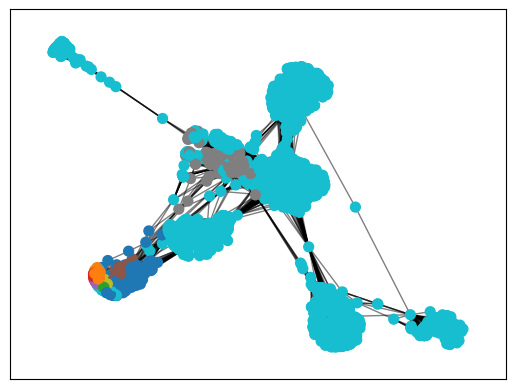

In [ ]:
if is_partition(G, partition):
    modularity = nx.community.modularity(G, partition)
    print("Modularity:", modularity)
else:
    print("Invalid partition.")

# Visualize the graph with node color according to the partition
pos = nx.spring_layout(G)
cmap = plt.get_cmap("tab10")
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=[cmap(partition[n]) for n in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

### *girvan_newman*


In [ ]:
#from networkx.algorithms.community.centrality import girvan_newman
#from networkx.algorithms.community.quality import modularity
#
## Apply Girvan-Newman Algorithm to obtain communities
#communities = tuple(girvan_newman(G))
#partition = {}
#for i, c in enumerate(communities[-1]):
#    for n in c:
#        partition[n] = i
#
## Print nodes in each community
#for community in communities:
#  print("Communities:", community)
#
#if is_partition(G, partition):
#    modularity_score = modularity(G, partition)
#    print("Modularity:", modularity_score)
#else:
#    print("Invalid partition.")
#
## Visualize the graph with node color according to the partition
#pos = nx.spring_layout(G)
#cmap = plt.get_cmap("tab10")
#nx.draw_networkx_nodes(G, pos, node_size=50, node_color=[cmap(partition[n]) for n in G.nodes()])
#nx.draw_networkx_edges(G, pos, alpha=0.5)
#plt.show()


### *Louvain*

In [ ]:
from community import community_louvain
# detect communities in the network
communities = community_louvain.best_partition(G)

# get nodes in each community
nodes_in_communities = {}
for node, community in communities.items():
    if community not in nodes_in_communities:
        nodes_in_communities[community] = [node]
    else:
        nodes_in_communities[community].append(node)

# print nodes in each community
for community, nodes in nodes_in_communities.items():
    print("Community ", community, ": ", nodes)

Community  0 :  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', 

<ipython-input-12-e860e67e283c>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(communities.values()) + 1)


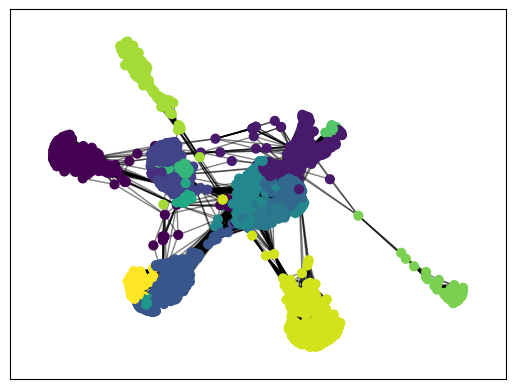

In [ ]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(communities.values()) + 1)
nx.draw_networkx_nodes(G, pos, communities.keys(), node_size=40,
                       cmap=cmap, node_color=list(communities.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

choose one of those two

Invalid partition.


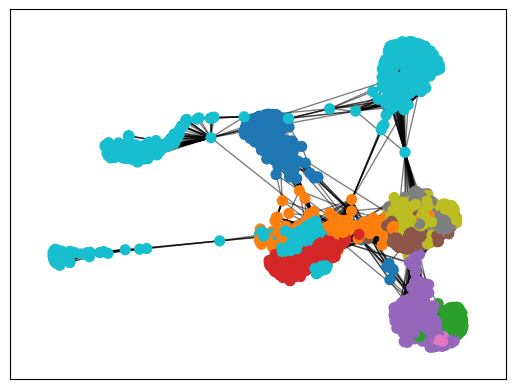

In [ ]:
# Calculate the degree distribution
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
degree_hist = [list(degree.values()).count(i) / float(nx.number_of_nodes(G)) for i in degree_values]

# Calculate the best partition using the Louvain algorithm
partition = community_louvain.best_partition(G)

if is_partition(G, partition):
    modularity = nx.community.modularity(G, partition)
    print("Modularity:", modularity)
else:
    print("Invalid partition.")

# Visualize the graph with node color according to the partition
pos = nx.spring_layout(G)
cmap = plt.get_cmap("tab10")
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=[cmap(partition[n]) for n in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Invalid partition.


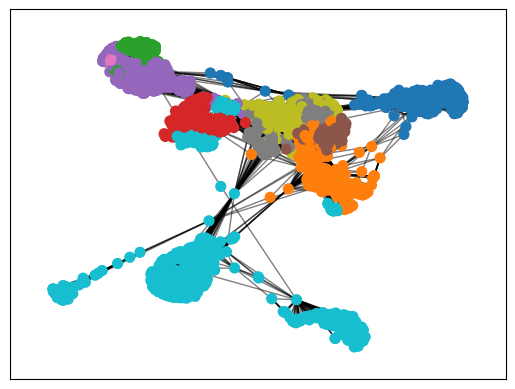

In [ ]:
if is_partition(G, partition):
    modularity = nx.community.modularity(G, partition)
    print("Modularity:", modularity)
else:
    print("Invalid partition.")

# Write the partition data to a CSV file
with open('communities.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Node', 'Community'])
    for node, community in partition.items():
        writer.writerow([node, community])

# Visualize the graph with node color according to the partition
pos = nx.spring_layout(G)
cmap = plt.get_cmap("tab10")
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=[cmap(partition[n]) for n in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Creating Graphs for CommunitiesCreating Graphs for Communities

---

In [ ]:
# Load the graph from the CSV file
G = nx.Graph()
with open('facebook_combined.csv', 'r') as infile:
    reader = csv.reader(infile)
    next(reader)  # Skip the first row (column names)
    for row in reader:
        source = int(row[0])
        target = int(row[1])
        G.add_edge(source, target)

# Calculate the best partition using the Louvain algorithm
partition = community_louvain.best_partition(G)

# Add the communities as node attributes
for node, community_id in partition.items():
    G.nodes[node]['community'] = community_id

# Export the graph to GEXF format
nx.write_gexf(G, 'graph_with_communities.gexf')

print("Graph exported successfully.")

Graph exported successfully.
